# 多元分類(Multiclass Classification)

##### 先引入我們所需要的packages

In [5]:
import os
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# 數據產生

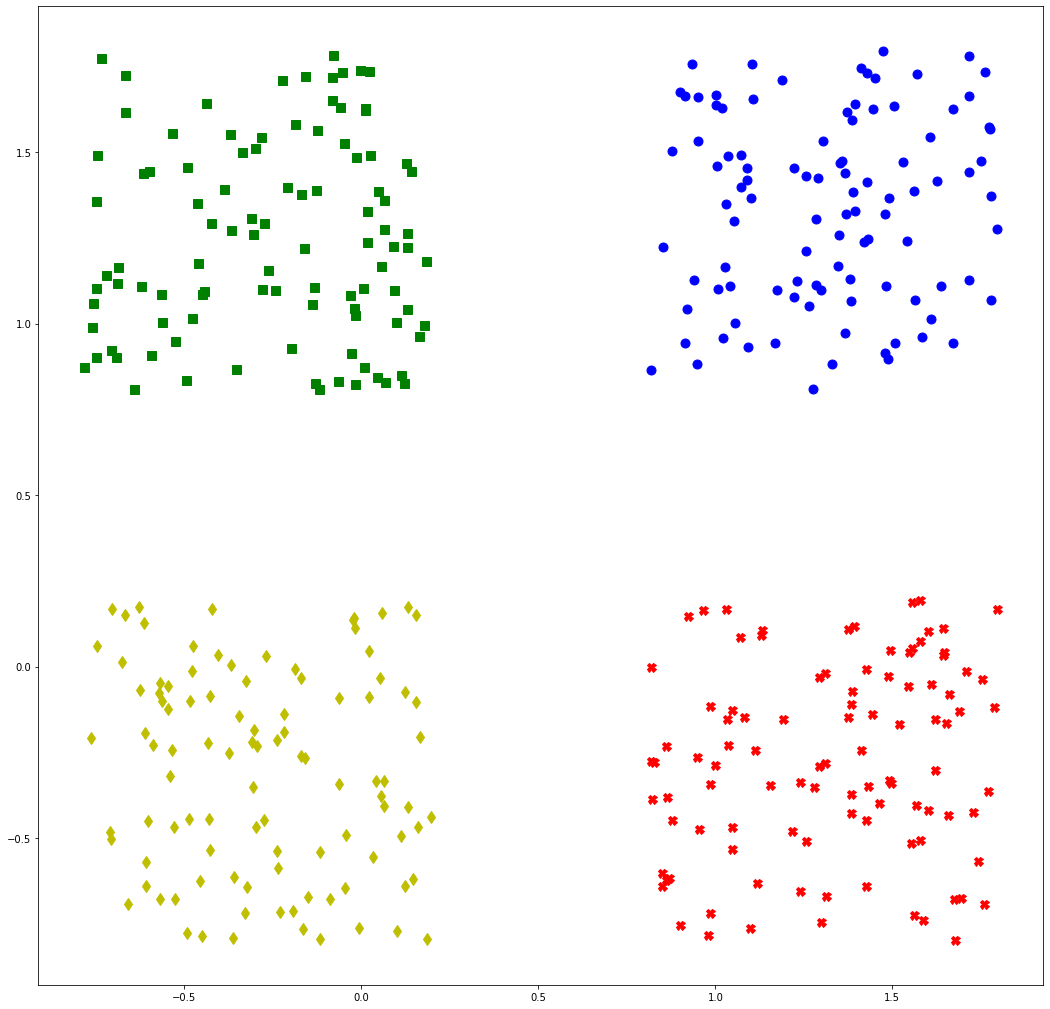

In [6]:
# 產生100筆資料，總共4種類別
data_num=100
class_num=4
# 宣告我們的數據點矩陣，和標籤矩陣
data_point=np.zeros((class_num*data_num,2))
data_label=np.zeros(class_num*data_num)
# 跑迴圈標記我們的資料位置
for i in range(0,class_num):
    # 數據間距設定
    t=0.8
    if(i==0):
        f,g=t,t
    elif(i==1):
        f,g=t,-t
    elif(i==2):
        f,g=-t,t
    else:
        f,g=-t,-t
    # 我們隨機產生數字來設定我們資料的位置
    for j in range(0,data_num):
        data_point[i*data_num+j,0],data_point[i*data_num+j,1]=random.random()+f,random.random()+g
        data_label[i*data_num+j]=i
# 繪圖
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(data_point[:100,0],data_point[:100,1],"bo",markersize=9)
plt.plot(data_point[100:200,0],data_point[100:200,1],"rX",markersize=9)
plt.plot(data_point[200:300,0],data_point[200:300,1],"gs",markersize=9)
plt.plot(data_point[300:400,0],data_point[300:400,1],"yd",markersize=9)
plt.show()

# Logistic Regression

In [7]:
def sigmoid(s):
    return(1/(1+np.exp(-s)))

# One-Versus-All

[[-8.33385426 -4.91741452 -4.45542275  0.56091333]
 [ 4.24113022  5.58659327 -5.61237206 -5.72654447]
 [ 4.44584758 -5.36223687  5.49282131 -5.89465952]]


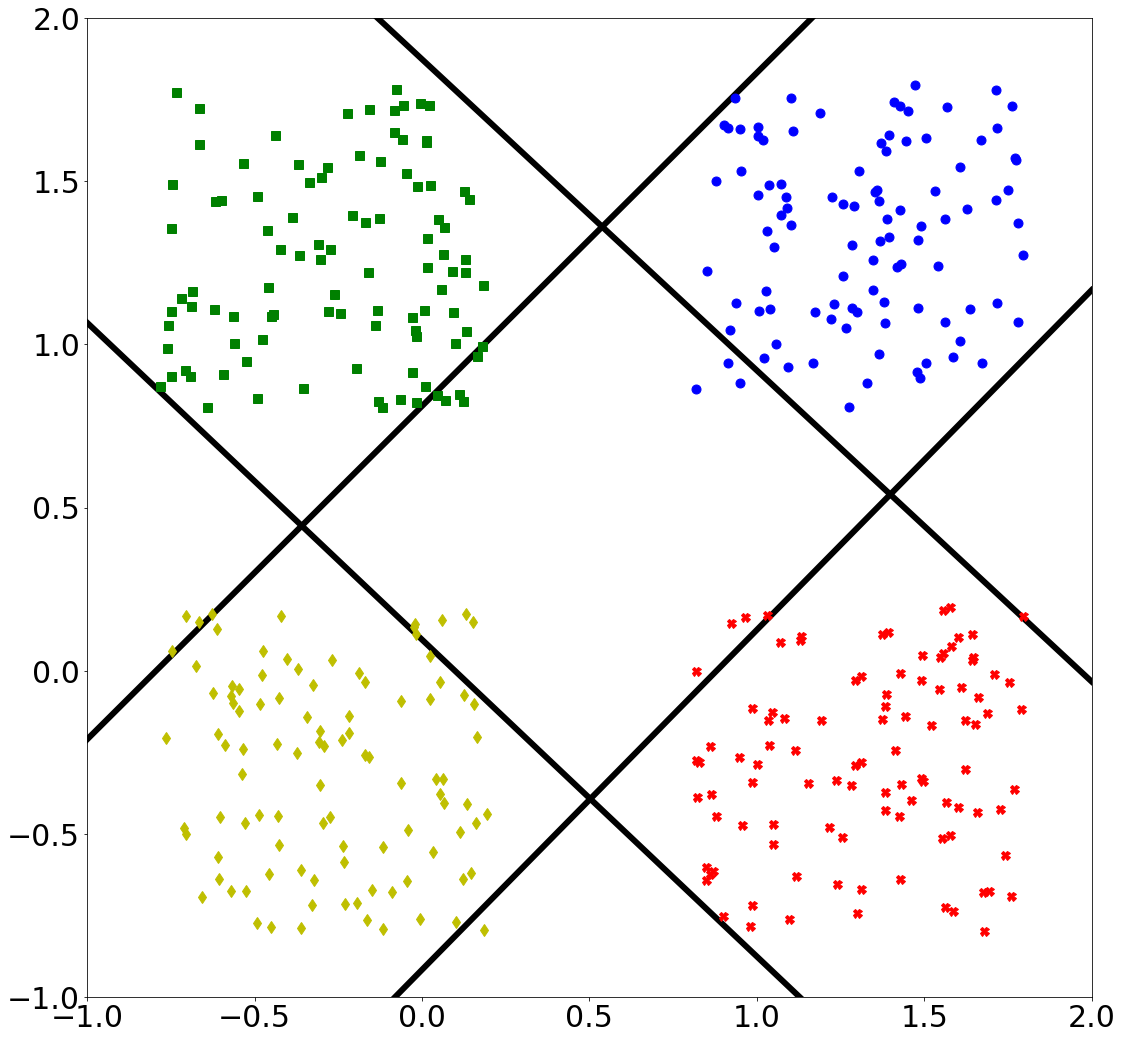

In [8]:
# 宣告權重矩陣
w=np.zeros((3,class_num))
# 跑迴圈執行每種類別
for i in range(0,class_num):
    # 宣告標記矩陣
    y=np.zeros(len(data_label))
    # 標記其中一個類別為1，其他為0
    y[i*data_num:(i+1)*data_num]=np.ones(data_num)
    x=data_point
    # 我們分別計算y的平均，x1y的平均，x2y的平均
    y_mean=np.mean(y)
    x1y_mean=np.mean(x[:,0]*y)
    x2y_mean=np.mean(x[:,1]*y)
    # 設定我們計算的次數T
    # 以及學習速度a
    T=1000
    a=1
    # 執行演算法
    for t in range(0,T):
        # 這裡我們計算h(x)、h(x)*x1、h(x)*x2的平均
        sigmoid_x_mean=0
        sigmoid_xx1_mean=0
        sigmoid_xx2_mean=0
        for j in range(0,data_num*class_num):
            tmp=sigmoid(w[0,i]+w[1,i]*x[j,0]+w[2,i]*x[j,1])
            sigmoid_x_mean+=tmp
            sigmoid_xx1_mean+=tmp*x[j,0]
            sigmoid_xx2_mean+=tmp*x[j,1]
        ln10=np.log(10)
        sigmoid_x_mean/=(data_num*class_num)
        sigmoid_xx1_mean/=(data_num*class_num)
        sigmoid_xx2_mean/=(data_num*class_num)
        # 更新我們的權重
        w[0,i]=w[0,i]-a*(sigmoid_x_mean-y_mean)/ln10
        w[1,i]=w[1,i]-a*(sigmoid_xx1_mean-x1y_mean)/ln10
        w[2,i]=w[2,i]-a*(sigmoid_xx2_mean-x2y_mean)/ln10

print(w)
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot([-2,2],[-w[1,0]/w[2,0]*-2+-w[0,0]/w[2,0],-w[1,0]/w[2,0]*2+-w[0,0]/w[2,0]],"k-",linewidth=6)
plt.plot([-2,2],[-w[1,1]/w[2,1]*-2+-w[0,1]/w[2,1],-w[1,1]/w[2,1]*2+-w[0,1]/w[2,1]],"k-",linewidth=6)
plt.plot([-2,2],[-w[1,2]/w[2,2]*-2+-w[0,2]/w[2,2],-w[1,2]/w[2,2]*2+-w[0,2]/w[2,2]],"k-",linewidth=6)
plt.plot([-2,2],[-w[1,3]/w[2,3]*-2+-w[0,3]/w[2,3],-w[1,3]/w[2,3]*2+-w[0,3]/w[2,3]],"k-",linewidth=6)

plt.plot(data_point[:100,0],data_point[:100,1],"bo",markersize=9)
plt.plot(data_point[100:200,0],data_point[100:200,1],"rX",markersize=9)
plt.plot(data_point[200:300,0],data_point[200:300,1],"gs",markersize=9)
plt.plot(data_point[300:400,0],data_point[300:400,1],"yd",markersize=9)
# 這裡是畫出分割線的算法
# 我們知道分割線滿足 w0*x0+w1*x1+w2*x2=0
# 所以 x2=-(w1/w2)*x1-(w0/w2)*x0
# 斜率 = -w1/w2、截距 = -w0/w2
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# xlim就是限制我們圖輸出的x座標
# ylim就是限制我們圖輸出的y座標
plt.xlim([-1,2])
plt.ylim([-1,2])
plt.show()

# One-Versus-One

[[-1.64405231 -2.36638394 -3.71158241 -0.21728541 -3.50236819 -3.39972236]
 [-1.74763277  7.92246641  3.94035519  4.35356048  7.66923405  0.67256578]
 [ 7.702329   -1.34076348  4.02526036 -4.47500973  0.58303109  7.81118942]]


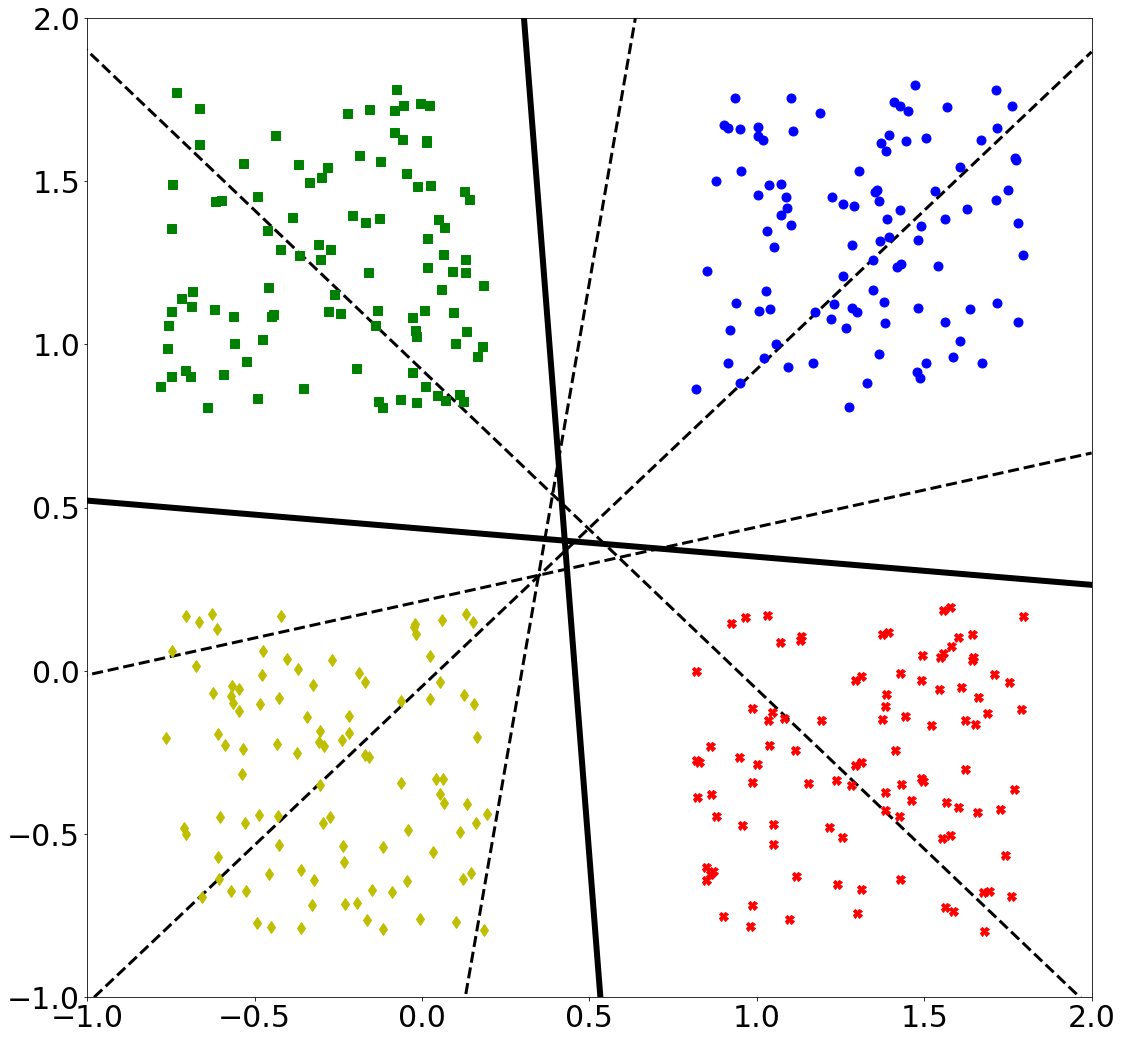

In [9]:
# 宣告權重矩陣
w=np.zeros((3,int(class_num*(class_num-1)/2)))
i=0
# 跑迴圈執行每種類別
# m&n: 0&1,0&2,0&3,1&2,1&3,2&3 
for m in range(0,class_num-1):
    for n in range(m+1,class_num):
        # 宣告標記矩陣
        y=np.zeros(2*data_num)
        # 標記其中一個類別為1，其他為0
        y[:data_num]=np.ones(data_num)
        x=np.concatenate((data_point[m*data_num:(m+1)*data_num,:],
                          data_point[n*data_num:(n+1)*data_num,:]),axis=0)
        # 我們分別計算y的平均，x1y的平均，x2y的平均
        y_mean=np.mean(y)
        x1y_mean=np.mean(x[:,0]*y)
        x2y_mean=np.mean(x[:,1]*y)
        # 設定我們計算的次數T
        # 以及學習速度a
        T=1000
        a=1
        # 執行演算法
        for t in range(0,T):
            # 這裡我們計算h(x)、h(x)*x1、h(x)*x2的平均
            sigmoid_x_mean=0
            sigmoid_xx1_mean=0
            sigmoid_xx2_mean=0
            for j in range(0,2*data_num):
                tmp=sigmoid(w[0,i]+w[1,i]*x[j,0]+w[2,i]*x[j,1])
                sigmoid_x_mean+=tmp
                sigmoid_xx1_mean+=tmp*x[j,0]
                sigmoid_xx2_mean+=tmp*x[j,1]
            ln10=np.log(10)
            sigmoid_x_mean/=(2*data_num)
            sigmoid_xx1_mean/=(2*data_num)
            sigmoid_xx2_mean/=(2*data_num)
            # 更新我們的權重
            w[0,i]=w[0,i]-a*(sigmoid_x_mean-y_mean)/ln10
            w[1,i]=w[1,i]-a*(sigmoid_xx1_mean-x1y_mean)/ln10
            w[2,i]=w[2,i]-a*(sigmoid_xx2_mean-x2y_mean)/ln10
        i+=1
print(w)
# 視覺化
x=np.linspace(-2,1,100)
x1=-w[1,0]/w[2,0]*x-w[0,0]/w[2,0]
x2=-w[1,1]/w[2,1]*x-w[0,1]/w[2,1]
x3=-w[1,2]/w[2,2]*x-w[0,2]/w[2,2]
x4=-w[1,3]/w[2,3]*x-w[0,3]/w[2,3]
x5=-w[1,4]/w[2,4]*x-w[0,4]/w[2,4]
x6=-w[1,5]/w[2,5]*x-w[0,5]/w[2,5]
x_aver=(x1+x2+x3+x4+x5+x6)/6

plt.rcParams["figure.figsize"] = (18,18)
plt.plot([-2,2],[-w[1,0]/w[2,0]*-2+-w[0,0]/w[2,0],-w[1,0]/w[2,0]*2+-w[0,0]/w[2,0]],"k--",linewidth=3)
plt.plot([-2,2],[-w[1,1]/w[2,1]*-2+-w[0,1]/w[2,1],-w[1,1]/w[2,1]*2+-w[0,1]/w[2,1]],"k--",linewidth=3)
plt.plot([-2,2],[-w[1,2]/w[2,2]*-2+-w[0,2]/w[2,2],-w[1,2]/w[2,2]*2+-w[0,2]/w[2,2]],"k--",linewidth=3)
plt.plot([-2,2],[-w[1,3]/w[2,3]*-2+-w[0,3]/w[2,3],-w[1,3]/w[2,3]*2+-w[0,3]/w[2,3]],"k--",linewidth=3)
plt.plot([-2,2],[-w[1,4]/w[2,4]*-2+-w[0,4]/w[2,4],-w[1,4]/w[2,4]*2+-w[0,4]/w[2,4]],"k-",linewidth=6)
plt.plot([-2,2],[-w[1,5]/w[2,5]*-2+-w[0,5]/w[2,5],-w[1,5]/w[2,5]*2+-w[0,5]/w[2,5]],"k-",linewidth=6)

plt.plot(data_point[:100,0],data_point[:100,1],"bo",markersize=9)
plt.plot(data_point[100:200,0],data_point[100:200,1],"rX",markersize=9)
plt.plot(data_point[200:300,0],data_point[200:300,1],"gs",markersize=9)
plt.plot(data_point[300:400,0],data_point[300:400,1],"yd",markersize=9)
# 這裡是畫出分割線的算法
# 我們知道分割線滿足 w0*x0+w1*x1+w2*x2=0
# 所以 x2=-(w1/w2)*x1-(w0/w2)*x0
# 斜率 = -w1/w2、截距 = -w0/w2
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# xlim就是限制我們圖輸出的x座標
# ylim就是限制我們圖輸出的y座標
plt.xlim([-1,2])
plt.ylim([-1,2])
plt.show()